<a href="https://colab.research.google.com/github/salazarmaria/Notas-de-IA/blob/main/Predecir_el_precio_de_Bitcoin/Recurrentes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd # Importo la librería pandas porque la voy a usar para manejar datos en forma de tablas
# Leo mi archivo CSV directamente desde el enlace
_df = pd.read_csv("https://gist.githubusercontent.com/mevangelista-alvarado/6f4f28c00f9e683108637cb3c8d5db89/raw/1ce753283fce23eeab952fa1d660a7069bbe9104/Bitcoin_1_1_2024-6_9_2024_historical_data_coinmarketcap.csv", delimiter=';')
# Ordenamos correctamente
_df = _df.sort_index(ascending=False) # Ordeno el DataFrame
_df.head() # Muestro las primeras filas para verificar que todo se cargó bien

,timeOpen,timeClose,timeHigh,timeLow,name,open,high,low,close,volume,marketCap,timestamp
158,2024-01-03T00:00:00.000Z,2024-01-03T23:59:59.999Z,2024-01-03T09:40:00.000Z,2024-01-03T12:10:00.000Z,2781,44961.603187,45503.241795,40813.534868,42848.175641,4.634232e+10,8.393459e+11,2024-01-03T23:59:59.999Z
157,2024-01-04T00:00:00.000Z,2024-01-04T23:59:59.999Z,2024-01-04T22:22:00.000Z,2024-01-04T01:26:00.000Z,2781,42855.814761,44770.023414,42675.174007,44179.921701,3.044809e+10,8.654825e+11,2024-01-04T23:59:59.999Z
156,2024-01-05T00:00:00.000Z,2024-01-05T23:59:59.999Z,2024-01-05T23:07:00.000Z,2024-01-05T01:49:00.000Z,2781,44192.978699,44353.285859,42784.718266,44162.691630,3.233603e+10,8.651827e+11,2024-01-05T23:59:59.999Z
155,2024-01-06T00:00:00.000Z,2024-01-06T23:59:59.999Z,2024-01-06T00:10:00.000Z,2024-01-06T07:07:00.000Z,2781,44178.954607,44227.631307,43475.156431,43989.194093,1.609250e+10,8.618220e+11,2024-01-06T23:59:59.999Z
154,2024-01-07T00:00:00.000Z,2024-01-07T23:59:59.999Z,2024-01-07T14:09:00.000Z,2024-01-07T23:45:00.000Z,2781,43998.464243,44495.571471,43662.228627,43943.097229,1.933057e+10,8.609518e+11,2024-01-07T23:59:59.999Z


In [4]:
'timeOpen', 'timeClose', 'timeHigh', 'timeLow', 'name', 'open', 'high',
'low', 'close', 'volume', 'marketCap', 'timestamp'
# timeOpen: aquí viene la fecha y hora exacta en la que empezó la cotización del día
# timeClose: fecha y hora en la que cerró la cotización del día
# timeHigh: momento exacto en el que Bitcoin alcanzó su precio más alto del día
# timeLow: momento en el que Bitcoin alcanzó su precio más bajo del día

('low', 'close', 'volume', 'marketCap', 'timestamp')

In [5]:
df = _df[['timeOpen', 'open', 'high', 'low', 'close']] # Aquí creo un nuevo DataFrame llamado df, pero solo selecciono las columnas que realmente necesito:

In [6]:
dates = df[['close']].values # Aquí estoy tomando solo la columna 'close' del DataFrame df

In [7]:
from sklearn.preprocessing import MinMaxScaler # Creo el objeto scaler y le digo que quiero que mis valores estén entre 0 y 1.
# Esto es importante porque muchos modelos funcionan mejor cuando los datos están normalizados

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dates) # Aplico el escalado a mis datos de cierre ('close').
# fit_transform primero aprende los valores mínimo y máximo
# y luego transforma toda la columna para que quede en el rango que yo definí

In [8]:
window_size = 60 # Defino el tamaño de mi ventana (window_size) en 60.
# Esto significa que mi modelo va a usar los últimos 60 días de precios para poder predecir el siguiente valo

In [9]:
import numpy as np
# Esta función crea las secuencias que mi modelo necesita.
# Básicamente toma 'window_size' datos seguidos (por ejemplo 60 días)
# y luego usa el dato siguiente como etiqueta (lo que quiero predecir)

def create_sequences(data, window_size):
    sequences = [] # Aquí voy guardando las ventanas de datos
    labels = [] # Aquí guardo el valor que quiero que el modelo aprenda a predecir
    for i in range(len(data) - window_size): # Recorro todos los datos menos el tamaño de la ventana, porque no puedo crear una secuencia si no tengo suficientes valores
        sequences.append(data[i:i+window_size]) # Agrego una secuencia de 60 datos (o del tamaño de window_size)
        # El precio es la primera columna
        labels.append(data[i + window_size, 0])   # Como mis datos tienen una sola columna (el 'close'),
        # tomo el valor justo después de la ventana. Ese va a ser mi "y
    return np.array(sequences), np.array(labels) # Regreso todo convertido a arreglos de NumPy porque los modelos lo requieren así

X, y = create_sequences(scaled_data, window_size) # Aquí ya genero mis X (entradas) y y (salidas)
# usando mis datos escalados y la ventana de 60 días

In [10]:
split = int(len(X) * 0.8) # Aquí calculo el punto donde voy a dividir mis datos.
# Estoy usando el 80% de las secuencias para entrenar (0.8)
# y el 20% para probar qué tan bien aprende mi model
# Con esto separo mis datos de entrada (X) en entrenamiento y prueba.
X_train, y_train = X[:split], y[:split] # X_train son las primeras secuencias (el 80%)
X_test, y_test = X[split:], y[split:] # X_test son las últimas secuencias (el 20%)


In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, SimpleRNN

model = Sequential() # Empiezo a construir mi modelo como una secuencia de capas
# Primera capa RNN:
# - units=120 → la capa tendrá 120 neuronas.
# - return_sequences=True → esto lo pongo en True porque voy a agregar otra capa RNN después.
# - input_shape=(window_size, X_train.shape[2]) → mis secuencias tienen 'window_size' pasos y 1 característica
model.add(SimpleRNN(units=120, return_sequences=True, input_shape=(window_size, X_train.shape[2])))
# Segunda capa RNN:
# - units=60 → esta capa tiene 60 neuronas.
# - return_sequences=False → como ya es la última capa recurrente, ya no necesito devolver secuencias
model.add(SimpleRNN(units=60, return_sequences=False))
# Capa densa intermedia con 30 neuronas para aprender patrones más complejos
model.add(Dense(units=30))
# Capa final con 1 neurona porque solo quiero predecir un valor
model.add(Dense(units=1))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [12]:
from tensorflow.keras.optimizers import Adam

# Defino la tasa de aprendizaje. Elegí 0.001 porque es un valor estable:
# aprende lo suficientemente rápido sin volverse inestable

learning_rate = 0.001
adam_optimizer = Adam(learning_rate=learning_rate)
# Compilo mi modelo usando el optimizador Adam y el error cuadrático medio,
# que es bueno cuando quiero minimizar la diferencia entre lo real y la predicción
# Compilar el modelo
model.compile(optimizer=adam_optimizer, loss='mean_squared_error')

# Entrenar el modelo
model.fit(X_train, y_train, batch_size=1, epochs=10) # Entreno el modelo con mis datos. Uso batch_size=1 porque estoy trabajando
# con una secuencia y quiero que aprenda cada ejemplo uno por uno.
# También puse 10 épocas para ver si aprende sin sobreentrenarse

Epoch 1/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.1295
Epoch 2/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0193
Epoch 3/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0113
Epoch 4/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0088
Epoch 5/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0095
Epoch 6/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0088
Epoch 7/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0053
Epoch 8/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0111
Epoch 9/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0071
Epoch 10/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0094


In [13]:
# Hacer predicciones
predictions = model.predict(X_test)
# Desescalar los datos predichos
# Desescalar los datos predichos para regresarlos a su valor original
# Como el scaler fue entrenado con más columnas, agregamos ceros para completar las 4 columnas y luego tomamos solo la primera
predictions = scaler.inverse_transform(np.concatenate((predictions, np.zeros((predictions.shape[0], 3))), axis=1))[:,0]
# Desescalar los valores reales de y_test de la misma manera para poder compararlos correctamente
y_test = scaler.inverse_transform(np.concatenate((y_test.reshape(-1, 1), np.zeros((y_test.shape[0], 3))), axis=1))[:,0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step


In [14]:
from sklearn.metrics import mean_absolute_error, mean_squared_error # Importamos las métricas para evaluar nuestro modelo

# Calculamos el error absoluto medio (MAE) para ver en promedio qué tan lejos están nuestras predicciones de los valores reales
mae = mean_absolute_error(y_test, predictions)
rmse = np.sqrt(mean_squared_error(y_test, predictions)) # Calculamos la raíz del error cuadrático medio (RMSE), que penaliza más los errores grandes

print(f"MAE: {mae}")
print(f"RMSE: {rmse}") # Mostramos los resultados para evaluar qué tan bien está funcionando nuestro modelo

MAE: 1473.5579230486364
RMSE: 1844.9067842673173


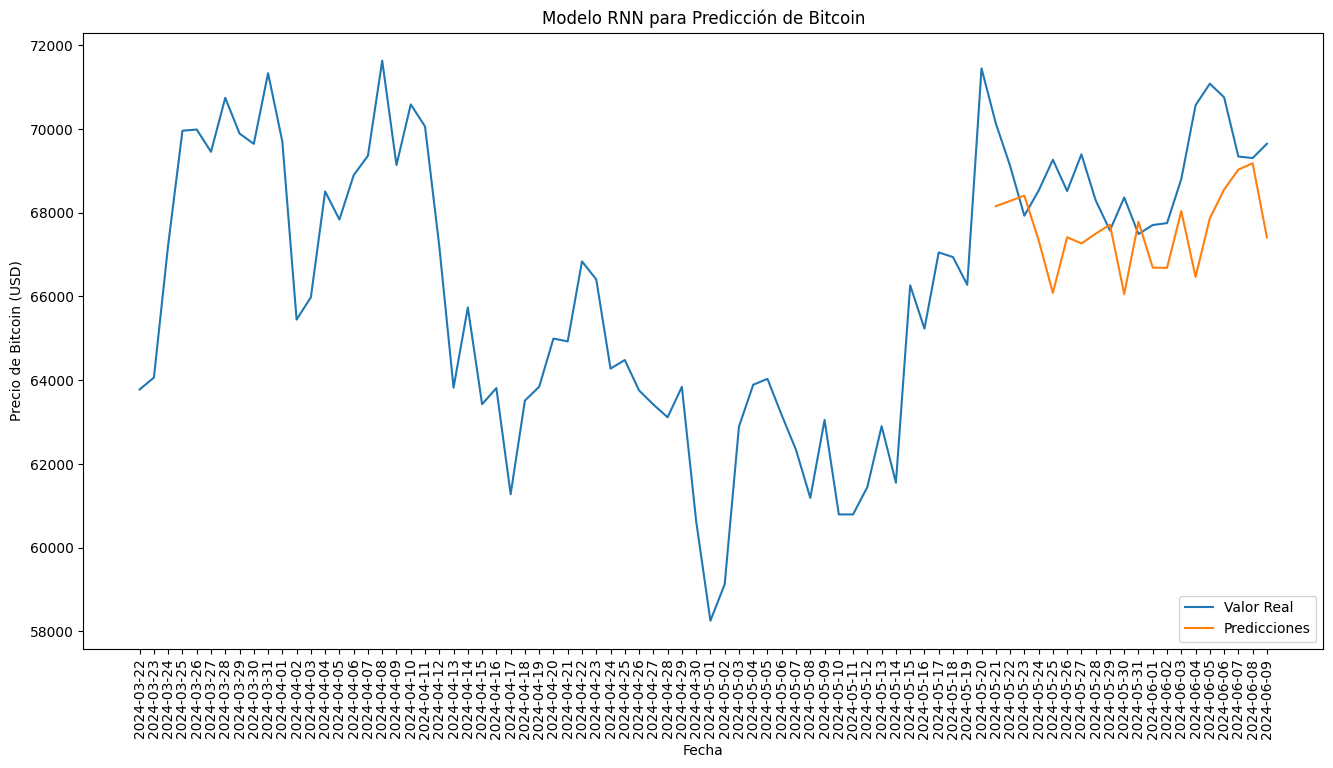

In [15]:
import matplotlib.pyplot as plt
import numpy as np

valid = df[split:] # Tomamos los datos de validación a partir del índice donde dividimos los datos
# Reiniciar el índice del DataFrame de validación
valid = valid.reset_index(drop=True) # Reiniciamos el índice del DataFrame de validación para que sea más fácil manejarlo
valid['Predictions'] = np.nan   # Creamos una nueva columna para las predicciones y la inicializamos con NaN

# Añadir las predicciones al DataFrame de validación desde el punto donde inician las predicciones
valid.loc[window_size:, 'Predictions'] = predictions # Llenamos la columna de predicciones a partir del punto donde realmente tenemos predicciones
dates_valid = pd.to_datetime(valid['timeOpen']).apply(lambda x: x.strftime('%Y-%m-%d')).tolist() # Convertimos las fechas a formato 'YYYY-MM-DD' para que se vean bien en la gráfica
# Configuramos la figura de la gráfica
plt.figure(figsize=(16,8))
plt.title('Modelo RNN para Predicción de Bitcoin')
plt.xlabel('Fecha')
plt.ylabel('Precio de Bitcoin (USD)')
plt.plot(dates_valid, valid[['close', 'Predictions']]) # Graficamos los valores reales y las predicciones
plt.legend(['Valor Real', 'Predicciones'], loc='lower right')
plt.xticks(rotation=90)
plt.show()

In [16]:
# Generar secuencias para los siguientes días
future_sequences = [] # Lista para guardar las secuencias que usaremos para predecir los próximos días
# Última secuencia de los valores que tenemos
last_sequence = X[-1] # Tomamos la última secuencia de datos que tenemos para iniciar las predicciones futuras

days = 10 # Definimos cuántos días queremos predecir
for _ in range(days):
    # Predecir el siguiente valor
    next_value = model.predict(np.array([last_sequence]))[0, 0]

    # Actualizar la secuencia para la siguiente predicción
    last_sequence = np.concatenate((last_sequence[1:], [[next_value]]), axis=0)

    # Añadir la nueva secuencia a las secuencias futuras
    future_sequences.append(last_sequence)  # Guardamos la nueva secuencia para seguir prediciendo los próximos días

# Convertir las secuencias futuras a un numpy y reshape para la RNN
future_sequences = np.array(future_sequences)
future_sequences = np.reshape(future_sequences, (future_sequences.shape[0], future_sequences.shape[1], 1))

# Hacer predicciones para los siguientes días
future_predictions = model.predict(future_sequences)

# Desescalamos las predicciones para que estén en el mismo rango que los precios reales
# Concatenamos ceros porque el scaler espera varias columnas
future_predictions = scaler.inverse_transform(np.concatenate((future_predictions, np.zeros((future_predictions.shape[0], 3))), axis=1))[:,0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


In [17]:
# Tomamos la última fecha de nuestros datos reales para saber desde cuándo generar las futuras fechas
last_date = df['timeOpen'].iloc[-1]
# Generamos un rango de fechas para los próximos 'days' días a partir de la última fecha
# Se pone [1:] para no repetir la fecha final de los datos reales
future_dates = pd.date_range(start=last_date, periods=days)[1:]
# Convertimos las fechas a formato 'YYYY-MM-DD' para que se vean bien en la gráfica o al mostrar resultados
future_dates = future_dates.strftime('%Y-%m-%d').tolist()

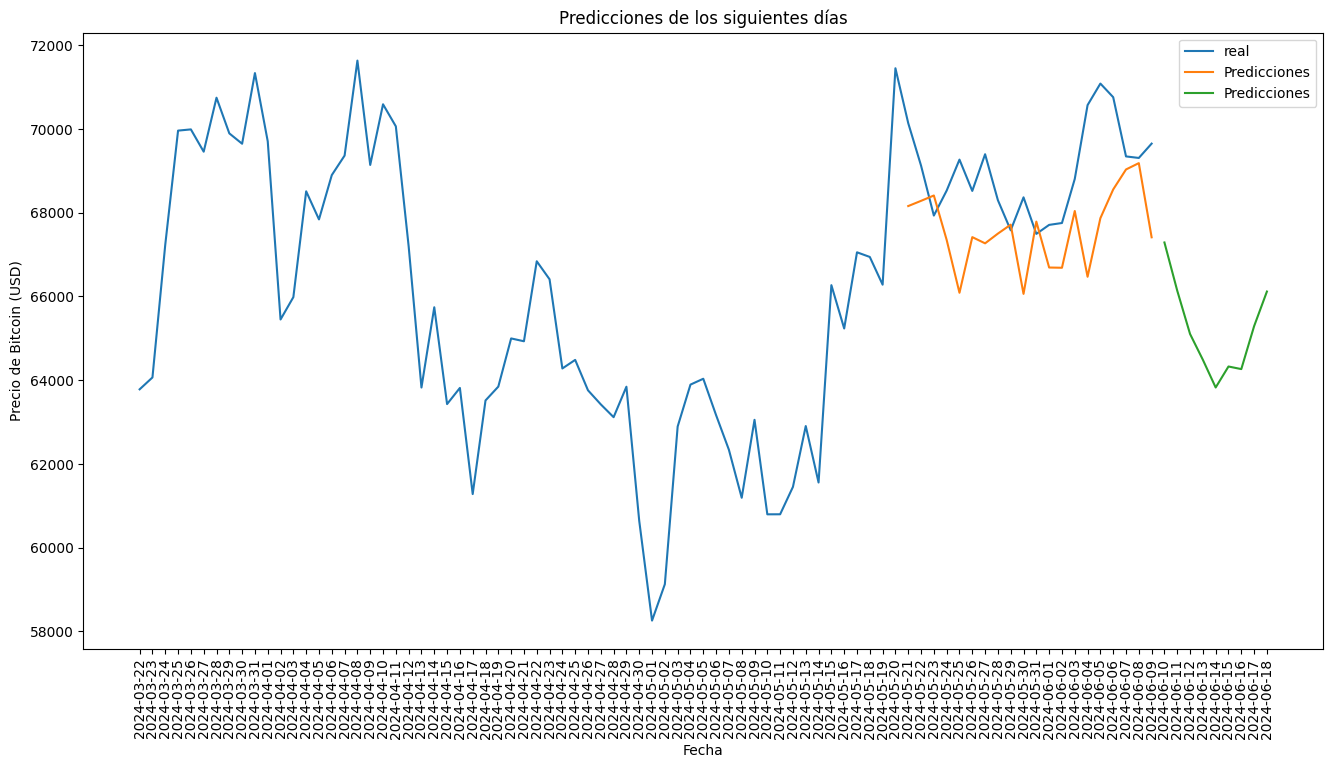

In [18]:
plt.figure(figsize=(16,8)) # Configuramos la figura para la gráfica de predicciones futuras
plt.title('Predicciones de los siguientes días')
plt.xlabel('Fecha')
plt.ylabel('Precio de Bitcoin (USD)')
plt.plot(dates_valid, valid[['close', 'Predictions']], label=['real', 'Predicciones']) # Graficamos los valores reales y las predicciones sobre los datos de validación
plt.plot(future_dates, future_predictions[:-1], label='Predicciones') # Graficamos las predicciones para los próximos días
# Se usa future_predictions[:-1] para ajustar la longitud y no causar errores de dimensión
plt.legend()
plt.xticks(rotation=90)
plt.show()